In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
data = pd.read_csv('weatherAUS.csv', parse_dates=True, na_values='NaN')

In [202]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [203]:
data.shape

(142193, 24)

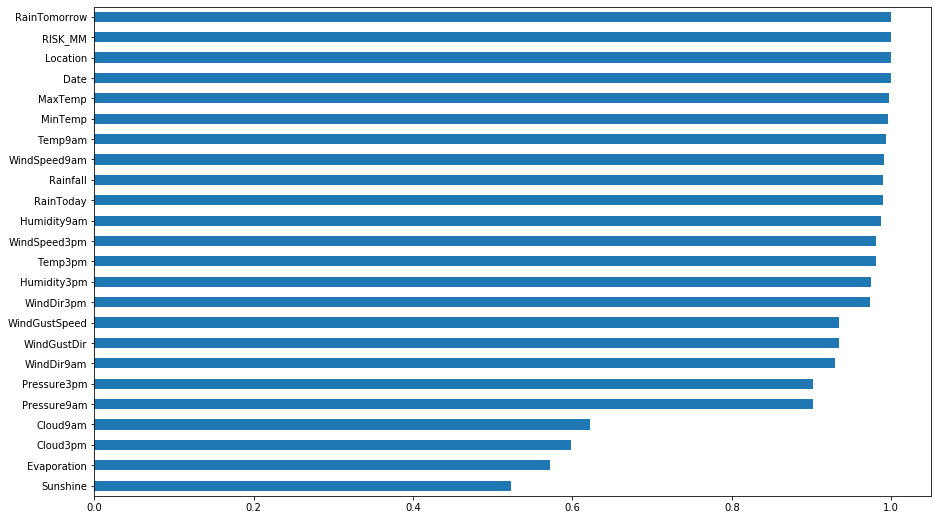

In [204]:
(data.count()/data.shape[0]).sort_values().plot.barh()

In [205]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [206]:
# As we can see the 4 features Cloud9am, Cloud3pm, Evaporation and Sunshine make almost 50% of there values missing 
# so remove the columns from our dataset

data.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], inplace=True)

In [207]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [208]:
data.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 20 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RISK_MM          142193 non-null float64
RainTomorrow     142193 non-null object
dtypes: float64(13), object(7)
memory usage: 21.7+ MB


In [210]:
# DATA COLUMNS WITH NON-STRING VALUES

data_columns_float = [column for column in data.columns if type(data[column].iloc[0]) != str]
data_columns_float

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [211]:
data.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [212]:
# Replacing the na values in the data with mean of the given feature

for column in data_columns_float:
    data[column].fillna(value = data[column].mean(), inplace=True)

In [213]:
data.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [214]:
data.shape

(142193, 20)

In [215]:
data = data.dropna()

In [216]:
data.shape

(123710, 20)

In [217]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [218]:
data[['RISK_MM', 'RainTomorrow']]

,RISK_MM,RainTomorrow
0,0.0,No
1,0.0,No
2,0.0,No
3,1.0,No
4,0.2,No
5,0.0,No
6,0.0,No
7,0.0,No
8,1.4,Yes
9,0.0,No


In [219]:
# As we can see from the above observation that the risk_mm is a feature that is predicting the rain_tomorrow feature...
# ... directly so it needs to be removed from the data set

data.drop(columns=['RISK_MM'], inplace=True)

In [220]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [221]:
data.shape

(123710, 19)

In [222]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [223]:
# splitting the data set into training and testing datasets

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, shuffle=True)


In [224]:
print(train.shape)
print(test.shape)

(98968, 19)
(24742, 19)


In [225]:
# categorical variables in our data set 
for column in data.columns:
    if type(data[column].iloc[0]) == str:
        print(column)

Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [226]:
# Converting categorical data into numerical data

train['RainToday'].replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
test['RainToday'].replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)

train['RainTomorrow'].replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
test['RainTomorrow'].replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)

C:\Users\Jahanvi\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [227]:
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
60820,2012-01-20,Sale,14.7,22.2,0.0,SSW,28.0,SW,SE,9.0,15.0,85.0,72.0,1016.8,1015.1,17.6,21.6,0,0
115127,2010-03-06,PerthAirport,12.8,29.5,0.0,ESE,44.0,E,E,28.0,22.0,45.0,27.0,1025.1,1020.8,19.9,28.9,0,0
70599,2015-11-16,Mildura,13.2,32.9,0.0,NNE,30.0,ENE,NNW,9.0,11.0,38.0,20.0,1016.2,1013.2,22.8,31.2,0,0
127376,2010-06-03,Hobart,6.0,16.1,0.0,NW,28.0,NW,NNW,19.0,11.0,81.0,56.0,1025.3,1023.3,8.4,15.1,0,0
44579,2008-06-16,Canberra,6.4,16.9,0.0,SSW,26.0,SSW,ESE,17.0,9.0,78.0,51.0,1027.8,1024.8,9.5,16.0,0,0


In [228]:
train['WindDir9am'].unique()

array(['SW', 'E', 'ENE', 'NW', 'SSW', 'N', 'WNW', 'SSE', 'NE', 'W', 'SE',
       'WSW', 'NNE', 'ESE', 'NNW', 'S'], dtype=object)

In [229]:
# Converting the remaining categorical values into 

### When to Use one-hot encoding and when to use label-encoding

#### One-Hot Encoding
1) When the given data is non-ordinal

2) Number of categorical features is less so that one-hot encoding can be applied

#### Label-Encoding
1) When the categorical feature is ordinal

2) When the number of categories is quite large, hence one-hot encoding can consume lot of memory

In [230]:
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
60820,2012-01-20,Sale,14.7,22.2,0.0,SSW,28.0,SW,SE,9.0,15.0,85.0,72.0,1016.8,1015.1,17.6,21.6,0,0
115127,2010-03-06,PerthAirport,12.8,29.5,0.0,ESE,44.0,E,E,28.0,22.0,45.0,27.0,1025.1,1020.8,19.9,28.9,0,0
70599,2015-11-16,Mildura,13.2,32.9,0.0,NNE,30.0,ENE,NNW,9.0,11.0,38.0,20.0,1016.2,1013.2,22.8,31.2,0,0
127376,2010-06-03,Hobart,6.0,16.1,0.0,NW,28.0,NW,NNW,19.0,11.0,81.0,56.0,1025.3,1023.3,8.4,15.1,0,0
44579,2008-06-16,Canberra,6.4,16.9,0.0,SSW,26.0,SSW,ESE,17.0,9.0,78.0,51.0,1027.8,1024.8,9.5,16.0,0,0


In [231]:
# Checking dependency of Remaining Categorical Functions on RainTomorrow

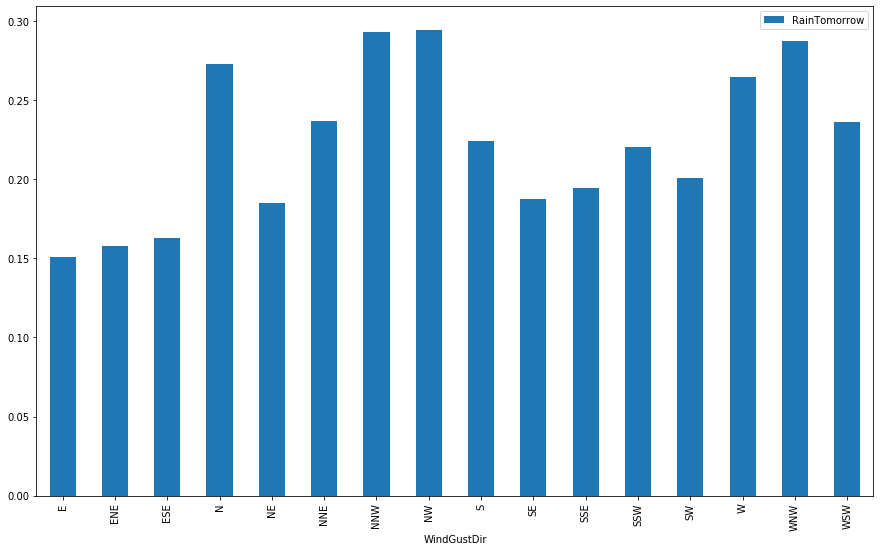

In [232]:
pd.pivot_table(train, values='RainTomorrow', index='WindGustDir', ).plot.bar()

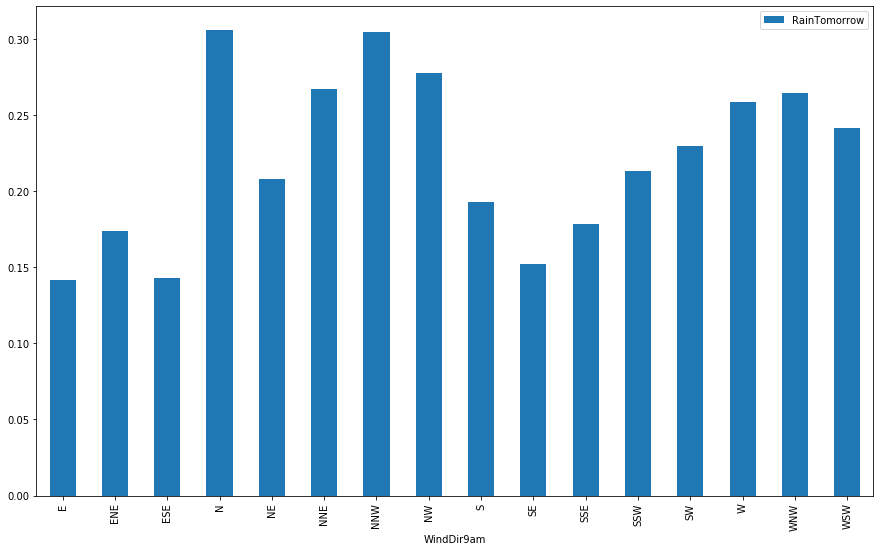

In [233]:
pd.pivot_table(train, values='RainTomorrow', index='WindDir9am').plot.bar()

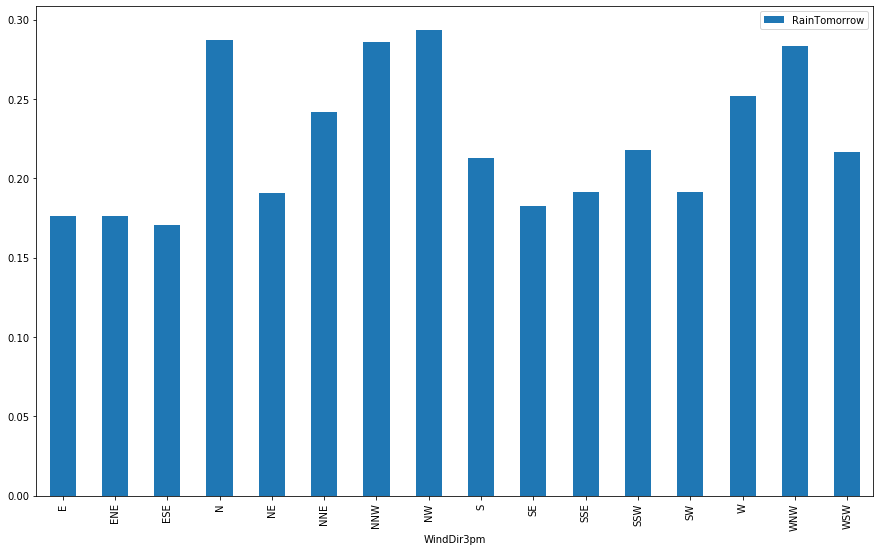

In [234]:
pd.pivot_table(train, values='RainTomorrow', index='WindDir3pm').plot.bar()

In [235]:
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
60820,2012-01-20,Sale,14.7,22.2,0.0,SSW,28.0,SW,SE,9.0,15.0,85.0,72.0,1016.8,1015.1,17.6,21.6,0,0
115127,2010-03-06,PerthAirport,12.8,29.5,0.0,ESE,44.0,E,E,28.0,22.0,45.0,27.0,1025.1,1020.8,19.9,28.9,0,0
70599,2015-11-16,Mildura,13.2,32.9,0.0,NNE,30.0,ENE,NNW,9.0,11.0,38.0,20.0,1016.2,1013.2,22.8,31.2,0,0
127376,2010-06-03,Hobart,6.0,16.1,0.0,NW,28.0,NW,NNW,19.0,11.0,81.0,56.0,1025.3,1023.3,8.4,15.1,0,0
44579,2008-06-16,Canberra,6.4,16.9,0.0,SSW,26.0,SSW,ESE,17.0,9.0,78.0,51.0,1027.8,1024.8,9.5,16.0,0,0


In [236]:
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

train = pd.get_dummies(train, columns=categorical_features)

In [237]:
test = pd.get_dummies(test, columns=categorical_features)

In [238]:
print(train.shape)
print(test.shape)

(98968, 64)
(24742, 64)


In [239]:
train.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
60820,2012-01-20,Sale,14.7,22.2,0.0,28.0,9.0,15.0,85.0,72.0,...,0,0,0,1,0,0,0,0,0,0
115127,2010-03-06,PerthAirport,12.8,29.5,0.0,44.0,28.0,22.0,45.0,27.0,...,0,0,0,0,0,0,0,0,0,0
70599,2015-11-16,Mildura,13.2,32.9,0.0,30.0,9.0,11.0,38.0,20.0,...,1,0,0,0,0,0,0,0,0,0


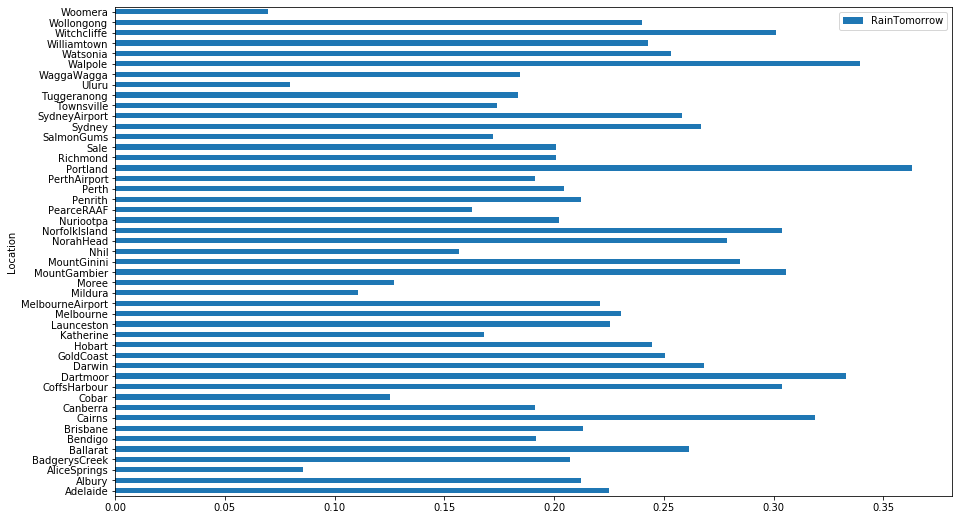

In [240]:
# The remaining two Non-Numeric features : Location and Data needs to be dealt with

pd.pivot_table(train, values='RainTomorrow', index='Location').plot.barh()

plt.rcParams['figure.figsize'] = (15,9)

In [241]:
# One-Hot Encoding of Location feature using pd.get_dummies()

train = pd.get_dummies(train, columns=['Location'])
test = pd.get_dummies(test, columns=['Location'])

In [242]:
train.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
60820,2012-01-20,14.7,22.2,0.0,28.0,9.0,15.0,85.0,72.0,1016.8,...,0,0,0,0,0,0,0,0,0,0
115127,2010-03-06,12.8,29.5,0.0,44.0,28.0,22.0,45.0,27.0,1025.1,...,0,0,0,0,0,0,0,0,0,0
70599,2015-11-16,13.2,32.9,0.0,30.0,9.0,11.0,38.0,20.0,1016.2,...,0,0,0,0,0,0,0,0,0,0
127376,2010-06-03,6.0,16.1,0.0,28.0,19.0,11.0,81.0,56.0,1025.3,...,0,0,0,0,0,0,0,0,0,0
44579,2008-06-16,6.4,16.9,0.0,26.0,17.0,9.0,78.0,51.0,1027.8,...,0,0,0,0,0,0,0,0,0,0


In [243]:
# Now the only remaining column to deal with is Date which we have to convert into neccessary data 

train['Month'] = pd.to_datetime(train['Date']).dt.month
test['Month'] = pd.to_datetime(test['Date']).dt.month

In [244]:
train.head()
test.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Month
80631,2014-07-26,7.5,15.4,0.4,24.0,7.0,6.0,100.0,82.0,1024.5,...,0,0,0,0,0,0,0,0,0,7
102277,2015-07-22,7.4,14.3,4.7,46.0,24.0,17.0,92.0,58.0,1020.8,...,0,0,0,0,0,0,0,0,0,7
19299,2013-10-14,13.4,17.6,8.4,54.0,20.0,33.0,51.0,55.0,1014.1,...,0,0,0,0,0,0,0,0,0,10
87492,2016-06-02,20.0,27.0,0.4,39.0,24.0,15.0,80.0,79.0,1016.5,...,0,0,0,0,0,0,0,0,0,6
13057,2012-04-28,14.4,16.7,8.0,28.0,13.0,15.0,95.0,95.0,1020.9,...,0,0,0,0,0,0,0,0,0,4


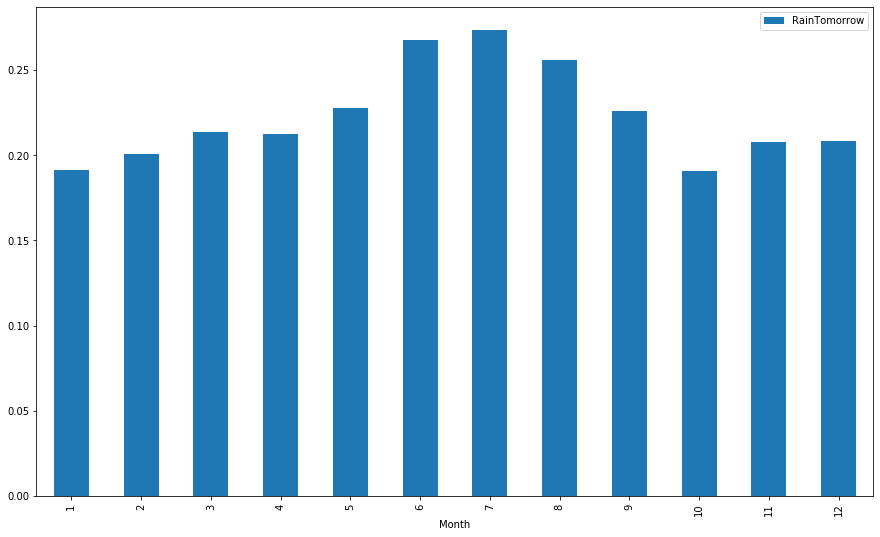

In [245]:
#  Checking the relation of month with rain

pd.pivot_table(train, values='RainTomorrow', index='Month').plot.bar()

In [246]:
# Cyclic Encoding the month feature in the given dataset

def applying_cyclic_encoding(dataset):
    
    dataset['Month_sine'] = np.sin((2*np.pi*dataset['Month'])/max(dataset['Month']))
    dataset['Month_cos'] = np.cos((2*np.pi*dataset['Month'])/max(dataset['Month']))

In [247]:
applying_cyclic_encoding(train)
applying_cyclic_encoding(test)

In [248]:
train.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Month,Month_sine,Month_cos
60820,2012-01-20,14.7,22.2,0.0,28.0,9.0,15.0,85.0,72.0,1016.8,...,0,0,0,0,0,0,0,1,5.000000e-01,8.660254e-01
115127,2010-03-06,12.8,29.5,0.0,44.0,28.0,22.0,45.0,27.0,1025.1,...,0,0,0,0,0,0,0,3,1.000000e+00,6.123234e-17
70599,2015-11-16,13.2,32.9,0.0,30.0,9.0,11.0,38.0,20.0,1016.2,...,0,0,0,0,0,0,0,11,-5.000000e-01,8.660254e-01
127376,2010-06-03,6.0,16.1,0.0,28.0,19.0,11.0,81.0,56.0,1025.3,...,0,0,0,0,0,0,0,6,1.224647e-16,-1.000000e+00
44579,2008-06-16,6.4,16.9,0.0,26.0,17.0,9.0,78.0,51.0,1027.8,...,0,0,0,0,0,0,0,6,1.224647e-16,-1.000000e+00


In [249]:
train.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Month,Month_sine,Month_cos
count,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,...,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,9.896800e+04,9.896800e+04
mean,12.417887,23.472857,2.395929,40.738148,15.023240,19.204218,67.669146,50.892881,1017.412737,1015.023855,...,0.022341,0.020401,0.021906,0.017713,0.021552,0.022805,0.023664,6.431160,8.596773e-03,9.316535e-03
std,6.372332,7.207401,8.639360,13.410421,8.311251,8.584059,18.954538,20.837413,6.771469,6.711811,...,0.147789,0.141367,0.146378,0.131906,0.145218,0.149283,0.152001,3.476161,7.068955e-01,7.072115e-01
min,-8.200000,-4.800000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000e+00,-1.000000e+00
25%,7.800000,18.100000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-5.000000e-01,-5.000000e-01
50%,12.200000,23.000000,0.000000,39.000000,13.000000,19.000000,68.843810,51.482606,1017.653758,1015.258204,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.224647e-16,6.123234e-17
75%,17.025000,28.600000,0.800000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000e-01,8.660254e-01
max,33.900000,47.300000,268.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.500000,1039.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000e+00,1.000000e+00


In [250]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [251]:
numeric_data = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
               'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
len(numeric_data)

12

In [252]:
# Rescaling the features in the above list of numeric_data

from sklearn.preprocessing import minmax_scale

for column in numeric_data:
    train[column] = minmax_scale(train[[column]])
    test[column] = minmax_scale(test[[column]])

In [253]:
train.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Month,Month_sine,Month_cos
60820,2012-01-20,0.543943,0.518234,0.0,0.164062,0.082353,0.152941,0.85,0.72,0.605000,...,0,0,0,0,0,0,0,1,5.000000e-01,8.660254e-01
115127,2010-03-06,0.498812,0.658349,0.0,0.289062,0.305882,0.235294,0.45,0.27,0.743333,...,0,0,0,0,0,0,0,3,1.000000e+00,6.123234e-17
70599,2015-11-16,0.508314,0.723608,0.0,0.179688,0.082353,0.105882,0.38,0.20,0.595000,...,0,0,0,0,0,0,0,11,-5.000000e-01,8.660254e-01
127376,2010-06-03,0.337292,0.401152,0.0,0.164062,0.200000,0.105882,0.81,0.56,0.746667,...,0,0,0,0,0,0,0,6,1.224647e-16,-1.000000e+00
44579,2008-06-16,0.346793,0.416507,0.0,0.148438,0.176471,0.082353,0.78,0.51,0.788333,...,0,0,0,0,0,0,0,6,1.224647e-16,-1.000000e+00


In [254]:
test.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Month,Month_sine,Month_cos
80631,2014-07-26,0.397022,0.369942,0.001088,0.132743,0.079365,0.054054,1.000000,0.82,0.719388,...,0,0,0,0,0,0,0,7,-5.000000e-01,-0.866025
102277,2015-07-22,0.394541,0.348748,0.012786,0.327434,0.349206,0.202703,0.919192,0.58,0.656463,...,0,0,0,0,0,0,0,7,-5.000000e-01,-0.866025
19299,2013-10-14,0.543424,0.412331,0.022851,0.398230,0.285714,0.418919,0.505051,0.55,0.542517,...,0,0,0,0,0,0,0,10,-8.660254e-01,0.500000
87492,2016-06-02,0.707196,0.593449,0.001088,0.265487,0.349206,0.175676,0.797980,0.79,0.583333,...,0,0,0,0,0,0,0,6,1.224647e-16,-1.000000
13057,2012-04-28,0.568238,0.394990,0.021763,0.168142,0.174603,0.175676,0.949495,0.95,0.658163,...,0,0,0,0,0,0,0,4,8.660254e-01,-0.500000


In [255]:
feature_data_train = train.drop(columns=['Date','RainTomorrow'])
feature_data_test = test.drop(columns=['Date','RainTomorrow'])

In [256]:
feature_data_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Month,Month_sine,Month_cos
60820,0.543943,0.518234,0.0,0.164062,0.082353,0.152941,0.85,0.72,0.605000,0.6080,...,0,0,0,0,0,0,0,1,5.000000e-01,8.660254e-01
115127,0.498812,0.658349,0.0,0.289062,0.305882,0.235294,0.45,0.27,0.743333,0.6992,...,0,0,0,0,0,0,0,3,1.000000e+00,6.123234e-17
70599,0.508314,0.723608,0.0,0.179688,0.082353,0.105882,0.38,0.20,0.595000,0.5776,...,0,0,0,0,0,0,0,11,-5.000000e-01,8.660254e-01
127376,0.337292,0.401152,0.0,0.164062,0.200000,0.105882,0.81,0.56,0.746667,0.7392,...,0,0,0,0,0,0,0,6,1.224647e-16,-1.000000e+00
44579,0.346793,0.416507,0.0,0.148438,0.176471,0.082353,0.78,0.51,0.788333,0.7632,...,0,0,0,0,0,0,0,6,1.224647e-16,-1.000000e+00


In [257]:
# Now there are 111 features in our dataframe so we need to apply some sort of feature selection technique in...
# ... order to reduce our features, suppose we apply lasso regression we still need an optimun values of ...
# ... our hyperparameter alpha in order to get best values of the coefficients of our features

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [258]:
model = Ridge()

In [259]:
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])

In [260]:
grid_search = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

In [261]:
grid_search.fit(feature_data_train, train['RainTomorrow'])

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [262]:
grid_search.best_score_

0.3409107351647581

In [263]:
grid_search.best_estimator_.alpha

0.1

In [264]:
# Hence for Ridge Regression when we have formulated that the value of alpha is 0.01 now using using this value...
# ... of alpha to calculate the value of the coefficients

ridge = Ridge(alpha=0.01)
ridge.fit(feature_data_train, train['RainTomorrow'])

Ridge(alpha=0.01)

In [265]:
l = []
for i in zip(feature_data_train.columns,ridge.coef_):
    l.append(i)

In [266]:
l

[('MinTemp', 0.13534773106826753),
 ('MaxTemp', -0.14079442978626408),
 ('Rainfall', 0.5959421194839252),
 ('WindGustSpeed', 1.121650861508107),
 ('WindSpeed9am', -0.09553024122426),
 ('WindSpeed3pm', -0.49679742415476585),
 ('Humidity9am', -0.0707513284656979),
 ('Humidity3pm', 1.0447682224437873),
 ('Pressure9am', 1.1697458226397954),
 ('Pressure3pm', -1.7185682943197642),
 ('Temp9am', -0.01471287394849164),
 ('Temp3pm', 0.14947313420020109),
 ('RainToday', 0.09384998077586386),
 ('WindGustDir_E', -0.004248804381736396),
 ('WindGustDir_ENE', -0.012377670846714798),
 ('WindGustDir_ESE', 0.014526730125214543),
 ('WindGustDir_N', -0.005624055108806113),
 ('WindGustDir_NE', -0.026324042572807047),
 ('WindGustDir_NNE', -0.02215058960019074),
 ('WindGustDir_NNW', 0.007466793798650428),
 ('WindGustDir_NW', 0.006869424902240343),
 ('WindGustDir_S', 0.012821457385693558),
 ('WindGustDir_SE', 0.017690304777511413),
 ('WindGustDir_SSE', 0.016203485653400816),
 ('WindGustDir_SSW', 0.004342903727

In [267]:
# Sorting the list of tuples based on the values of the coefficients

l = sorted(l, key=lambda x: x[1])

In [268]:
l

[('Pressure3pm', -1.7185682943197642),
 ('WindSpeed3pm', -0.49679742415476585),
 ('Location_MountGinini', -0.18037674658154612),
 ('Location_Wollongong', -0.1464363232407325),
 ('MaxTemp', -0.14079442978626408),
 ('Location_Katherine', -0.11863335578200092),
 ('Location_Townsville', -0.11349613975209835),
 ('Location_NorahHead', -0.11118685257026047),
 ('WindSpeed9am', -0.09553024122426),
 ('Location_Darwin', -0.08361185840578071),
 ('Location_NorfolkIsland', -0.0825073439375639),
 ('Location_GoldCoast', -0.07758245151961177),
 ('Humidity9am', -0.0707513284656979),
 ('Location_Hobart', -0.06701263953004152),
 ('Location_Launceston', -0.06032442754299759),
 ('Location_Cairns', -0.03804320049111684),
 ('Location_Walpole', -0.03648715813468332),
 ('Location_Sale', -0.03203855005728335),
 ('WindDir3pm_NE', -0.03128202309871138),
 ('WindDir9am_S', -0.02726331526955914),
 ('WindGustDir_NE', -0.026324042572807047),
 ('Location_Ballarat', -0.023603588257862088),
 ('WindDir3pm_SW', -0.023373355

In [269]:
# As we can see that the coefficients of the first 14 parameters have decent value, so we are selecting only...
# ... these features to be used in training our model of logistic regression

top_features = l[:14]
top_features

[('Pressure3pm', -1.7185682943197642),
 ('WindSpeed3pm', -0.49679742415476585),
 ('Location_MountGinini', -0.18037674658154612),
 ('Location_Wollongong', -0.1464363232407325),
 ('MaxTemp', -0.14079442978626408),
 ('Location_Katherine', -0.11863335578200092),
 ('Location_Townsville', -0.11349613975209835),
 ('Location_NorahHead', -0.11118685257026047),
 ('WindSpeed9am', -0.09553024122426),
 ('Location_Darwin', -0.08361185840578071),
 ('Location_NorfolkIsland', -0.0825073439375639),
 ('Location_GoldCoast', -0.07758245151961177),
 ('Humidity9am', -0.0707513284656979),
 ('Location_Hobart', -0.06701263953004152)]

In [270]:
top_feature_names = [feature[0] for feature in top_features]

In [271]:
top_feature_names

['Pressure3pm',
 'WindSpeed3pm',
 'Location_MountGinini',
 'Location_Wollongong',
 'MaxTemp',
 'Location_Katherine',
 'Location_Townsville',
 'Location_NorahHead',
 'WindSpeed9am',
 'Location_Darwin',
 'Location_NorfolkIsland',
 'Location_GoldCoast',
 'Humidity9am',
 'Location_Hobart']

In [272]:
from sklearn.linear_model import LogisticRegression

In [273]:
lr = LogisticRegression()
lr.fit(feature_data_train[top_feature_names], train['RainTomorrow'])

LogisticRegression()

In [274]:
predict = lr.predict(feature_data_test[top_feature_names])

In [275]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [276]:
# Using 10 fold cross-validation to get the average of the accuray
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr,feature_data_train[top_feature_names], train['RainTomorrow'],cv=10)

In [277]:
scores.mean()

0.8041588813444607